<a href="https://colab.research.google.com/github/sergiogf93/MetNumerics/blob/master/notebooks/11_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<p  style="font-size: 3rem; line-height: 4rem; font-weight: bold; text-align: center;"> Tutorial: Introduction to Data Analysis and Machine Learning</p>

<p style="font-size: 2rem; font-weight: bold; text-align: center;"> Kai A. Brügge & Maximilian Nöthe</p>

<p style="font-size: 1.5rem; font-weight: bold; text-align: center;"> DPG Früjahrstagung Aachen 2019</p>

<img width="200px" src="https://www.dpg-physik.de/vereinigungen/fachuebergreifend/ak/akpik/pix/logo-ak-pik_blue.png"/>


> __People worry that computers will get too smart and take over the world, but the real problem is that they're too stupid and they've already taken over the world.__

> Pedro Domingos 


In [0]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [0]:
%%html
<style>
.important
{
     margin: 0 auto;
     width: 66%; 
     background-color: linen;
}
</style>

<script>
$(this).html().replace("#e58139","#f2f2f2")
</script>




Do not delete, math definitions here
$$
% vectors and matrices
\def\v#1{\boldsymbol{#1}}
\def\m#1{\boldsymbol{#1}}
% confusion matrix stuff
\def\TP{\mathit{TP}}
\def\TN{\mathit{TN}}
\def\FP{\mathit{FP}}
\def\FN{\mathit{FN}}
\def\mse{{\rm mse}}
\def\E{{\rm E}}
\def\Var{{\rm Var}}
\def\Bias{{\rm Bias}}
\def\T{\mathtt{True}}
\def\F{\mathtt{False}}
$$


<h1 id="tocheading">Continguts</h1>
<div id="toc"></div>

# Supervised Machine Learning


## Notació matemàtica i descripció del problema

*Per més informació "Elements of statistical Learning" by Trevor Hastie.
(http://web.stanford.edu/~hastie/ElemStatLearn/)* 

* Les lletres majúscules com $ X $ o $ Y $ indiquen aspectes genèrics d’una variable (és a dir, la variable aleatòria real)
* Els valors observats s'escriuen en minúscules. El i-èsim valor de $ X $ s’escriu com $ x_i $
* Les matrius estan escrites en negreta amb lletres majúscules $ \m {X} $
* Les observacions es distribueixen com a * files * a la matriu mentre que les variables observades són les * columnes *

Així, si mesurem dos observables $ p = 2 $ (mida i pes) de $ N = 100 $ persones, obtenim una matriu $ \m {X} $ ($ N \times p $ ).


Una possible definició del Supervised Machine Learning:

> Donada una matriu $ \m {X} $ ($ N \times p $) i un vector output associat $ Y \in \mathbb{R} ^ N $,
  troba una funció $ f (X) = \hat{Y} $ que pren un vector $ X \in \mathbb {R} ^ p $ i retorna una predicció per $ \hat {Y} $
  on es minimitza una "loss function" $ L (Y, f (X)) ~~ \forall X $.
 

## L'exemple del Titanic. Aprendre del desastre.

A la primavera de 1912 el Titanic va emprendre un viatge per creuar l'oceà Atlàntic. Malauradament va xocar contra un iceberg la nit del 14 d'abril i es va enfonsar poc després.

El desastre va causar una indignació generalitzada sobre el que es va veure com una falta de seguretat. Les noves lleis de seguretat marítima que es van establir després de l’enfonsament encara són vigents avui dia.

Què podem aprendre del Titanic només mirant les dades de passatgers?

Les nostres dades contenen una llista del nom, sexe, edat i preu del bitllet per a cada passatger (conegut).

Importeu el fitxer **titanic.xls** trobat al repositori.

![titanic_cover.jpg](attachment:titanic_cover.jpg)

### Let's explore the data at first

In [0]:
!pip install --upgrade pandas

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [0]:
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

plt.rcParams['figure.figsize'] = (10.5, 7)
plt.rcParams['font.size'] = 12

colors = ['xkcd:sky', 'xkcd:grass']
cmap = ListedColormap(colors)

In [0]:
passengers = pd.read_excel('titanic.xls')


passengers.head()

La supervivència està codificada com 1, la mort com a 0.

Anem a canviar-ho en un tipus de dades significatives per python

In [0]:
passengers['survived'] = passengers['survived'].astype(bool)

In [0]:
(
    passengers.survived
    .value_counts()
    .sort_index()
    .plot.pie(autopct='%.1f %%', colors=colors)
)

In [0]:
fig, axs = plt.subplots(1, 2)

for i, (sex, group) in enumerate(passengers.groupby('sex')):
    (
        group
        .survived
        .value_counts()
        .sort_index()  # make sure the same label get's the same color
        .plot.pie(autopct='%.1f %%', colors=colors, title=sex, ax=axs[i])
    )

In [0]:
import numpy as np
import seaborn as sns


plot_data = passengers[['fare', 'sex', 'age', 'survived']].dropna() 
plot_data['log_fare'] = np.log10(1 + plot_data['fare'])


age_range = [plot_data.age.min(), plot_data.age.max()]
fare_range = [plot_data.log_fare.min(), plot_data.log_fare.max()]
    

for sex, df_sex in plot_data.groupby('sex'):
    
    df_sex.copy().dropna(inplace=True)
    g = sns.JointGrid(x='log_fare', y='age', data=plot_data) 
    g.fig.suptitle(sex)
    
    m = g.ax_joint.scatter(
        df_sex['log_fare'],
        df_sex['age'],
        c=df_sex['survived'],
        cmap=cmap,
        s=10,
    )

    for label, group in df_sex.groupby('survived'):    
        g.ax_marg_y.hist(
            group['age'], bins=15, range=age_range, 
            histtype='step', lw=2, color=colors[label], orientation='horizontal'
        )
        g.ax_marg_x.hist(
            group['log_fare'], bins=15, range=fare_range,
            histtype='step', lw=2, color=colors[label],
        )
    
    cbar = plt.colorbar(m)
    cbar.set_ticks([0.25, 0.75])
    cbar.set_ticklabels(['Died', 'Survived'])
    g.fig.tight_layout()

__La tasca:__

Donat un vector $\boldsymbol{X} = (\mathtt{fare}, \mathtt{pclass}, \mathtt{age}, \mathtt{sex})$ podem trobar una funció $f_\text{survival}(x) \in \{\T, \F\}$ que predigui acuradament la supervivència dels passatgers en la majoria  de casos?

Com podem saber si la funció $f_\text{survival}(x)$  és bona?

Per tenir una certa mesura de la qualitat d’aquest predictor, recopilem els següents números:

* __True Positives__ $\TP$, El nombre de prediccions correctes que són de tipus 'positiu'

* __False Positives__ $\FP$, El nombre d’esdeveniments predits falsament com a positius que pertanyen a la classe "negativa"
* __True Negatives__ $\TN$, El nombre d’esdeveniments predits correctament que pertanyen a la classe “negativa”
* __False Negatives__ $\FN$, El nombre d’esdeveniments predits falsament com a negatius que pertanyen a la classe "positiva"

Podem mirar la fracció d’observacions correctament etiquetades a les dades

$$
    \mathrm{accuracy}(\v{y}, \v{\hat{y}}) = \frac{1}{N} \sum_{i = 1}^N \mathbb{1}(y_i = \hat{y}_i)
$$

o simplement

$$
    \mathrm{accuracy}(\v{y}, \v{\hat{y}}) =  \frac{\TP + \TN}{ \TP + \FP + \FN + \TN} = \frac{\text{correctly predicted observations}}{\text{total number of observations}}.
$$


Ara intentem trobar una funció on la precisió sigui superior a 0,5

__ Una solució possible __:

Primer les dones i els nens?

In [0]:
def f_survival(df):
    return df['sex'] == 'female'


truth = passengers['survived']
prediction = f_survival(passengers)

prediction.head()

Quina precisió obtenim?

In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score

confusion = confusion_matrix(truth, prediction)
accuracy = accuracy_score(truth, prediction)

confusion, accuracy

In [0]:
import seaborn as sns



def plot_confusion(truth, prediction):
    ''' We need this a couple of times, so let's make a function '''

    accuracy = accuracy_score(truth, prediction)
    confusion = confusion_matrix(truth, prediction)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 3), constrained_layout=True)


    fig.suptitle(f"Accuracy {accuracy:.1%}")
    
    df = pd.DataFrame({
        'truth': pd.Series(truth).value_counts().sort_index(),
        'prediction': pd.Series(prediction).value_counts().sort_index(),
    })
    df.plot.barh(color=['gray', colors], ax=ax1, legend=False)
    
    sns.heatmap(
        confusion,
        annot=True,
        fmt="d",
        cmap='viridis',
        xticklabels=["False", "True"],
        yticklabels=["False", "True"],
        ax=ax2,
        square=True,
    )
    
    ax2.text(0.5, -0.2, 'Prediction', transform=ax2.transAxes, ha='center', va='top')
    ax2.text(-0.2, 0.5, 'Truth', transform=ax2.transAxes, ha='right', va='center', rotation=90)
    return ax1, ax2
    
plot_confusion(truth, prediction)

Com podem millorar la classificació?

Podem intentar aprendre més sobre el que va passar al Titanic.

Si mirem la pel·lícula de 1997 on **SPOILER** Leonardo Di Caprio s'ofega juntament amb molts dels seus amics passatgers de tercera classe.

<br/>
<br/>
<br/>
<br/>
<img width="50%" src=" 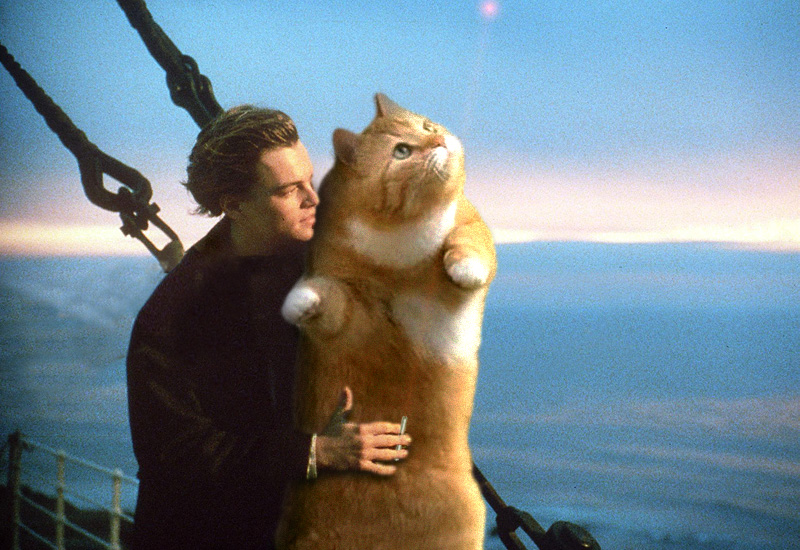"/>

Considerem que les persones riques entren en els bots salvavides

In [0]:
def f_class(passenger_class):
    return passenger_class == 1


prediction = passengers['pclass'].apply(f_class)
truth = passengers['survived']

plot_confusion(truth=truth, prediction=prediction)

## Linear Models

Podem millorar el nostre predictor combinant més variables?

Considerem una combinació ponderada lineal de variables:

$\def\RSS{\operatorname{RSS}}$

$$
f(x)= \hat{y} =  \hat{\beta}_0 + \sum_{j=1}^p x_j \hat{\beta}_j
$$
on $f:\mathbb{R}^{p} \to \mathbb{R}$.

Per a una sola mostra de les dades del Titanic, simplement avaluem:
$$
f(x)= \hat{\beta}_0 + x_\text{Class} \hat{\beta}_1 + x_\text{Sex} \hat{\beta}_2
$$

Si posem 1 com la primera entrada de la nostra mostra $\v{x}$ e.g. $\v{x} = (1, x_1, x_2, \ldots, x_p)$ podem reescriure
$f$ en forma de matriu

$$
f(x)= \hat{y} =  \v{x}^\top \v{\beta}
$$

on $\v{\beta} = (\beta_0, \beta_1, \beta_2, \ldots, \beta_p)$.



Com trobem aquests pesos? Igual que abans escollim una funció de pèrdua i intentem l'optimitzar-la.
En aquest cas, escollim una funció de pèrdua anomenada suma residual de quadrats (residual sum of squares RSS).

La calculen sobre totes les mostres $x_i$ a una matriu $\boldsymbol{X}$.

<div class="important"> 

$$L(\v{\beta}) = \RSS(\v{\beta}) = \sum_{i=1}^N (y_i - \v{x}_i^\top \v\beta)^2 $$

</div>



on $\v{x}_i$ és una fila de $\v{X}$, i per tant, cal fer la transposada.

Ara podem reescriure la funció de pèrdua en forma de matriu:

$$
\RSS(\v\beta) = (\v{y} - \m{X} \v\beta)^\top (\v{y} - \m{X} \v\beta )
$$

Ara optimitzem la funció de pèrdua de la mateixa manera que ho faríem amb qualsevol altra funció, mitjançant la diferenciació respecte de $ \v \beta $ i imposant que el resultat sigui igual a zero.

Per més informació sobre el procediment per fer càlcul sobre matrius, mireu https://en.wikipedia.org/wiki/Matrix_calculus, 

Necessitem la regla de la cadena:
$$
\frac{\partial({\v{u}} \cdot {\v{v}})}{\partial{\v{x}}}= 
 \v{u}^\top \frac{\partial \v{v}}{\partial \v{x}} + \v{v}^\top \frac{\partial \v{u}}{\partial \v{x}}
$$

En el nostre cas:
$$
 2 \cdot \m{X}^T (\v{y} - \m{X} \v\beta ) \stackrel{!}{=} 0
$$

La corresponent $\v\beta$ ldóna

$$
\hat{\v\beta} = (\m{X}^\top \m{X})^{-1} \m{X}^\top \v{y}
$$


Acabem de fer una regressió de __Mínims Quadrats__.

Ara podem definir una funció per predir la supervivència d'un passatger com:

$$
\hat{y} = \begin{cases}
\T, & \text{if $ f(x) \gt 0.5$} \\
\F, & \text{if $ f(x) \le 0.5$}
\end{cases}
$$ 



In [0]:
from sklearn import linear_model
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=400, centers=2, cluster_std=1., random_state=0)

# train the linear regressor and save the coefficents

reg = linear_model.LinearRegression()
reg.fit(X, y)
b_1, b_2 = reg.coef_
b_0 = reg.intercept_

# solve the function y = b_0 + b_1*X_1 + b_2 * X_2 for X2
x1s = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 2)
x2s = (0.5 - b_0 - b_1 * x1s) / b_2


fig, ax = plt.subplots()

ax.scatter(X[:, 0], X[:, 1], s=25, c=y, cmap=cmap)

ax.plot(x1s, x2s, color='gray', linestyle='--')

ax.grid()
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.margins(x=0, y=0)

ax.fill_between(x1s, x2s, np.max(X[:, 1]), color='xkcd:sky', alpha=0.1)
ax.fill_between(x1s, x2s, np.min(X[:, 1]), color='xkcd:grass', alpha=0.1)
ax.set_aspect(1)


Acabem d'*aprendre* els paràmetres d’un model estadístic basat en dades etiquetades.

Pot aquesta classificació lineal millorar la classificació del cas del Titanic?


### Aplicació al conjunt de dades titànic (preparació de dades)

Amb conjunts de dades del món real, les coses són més complicades

El conjunt de dades del Titanic conté:

* Falta de dades (p. Ex., "age" i "fare")
* Dades no numèriques (p. Ex., "sex")
* Dades categòriques (possiblement "pclass")
* Columnes que són massa indicatives del resultat del que volem predir (`boat`,` body`)

#### Falta de dades

In [0]:
passengers.count().sort_values()

Hi ha diferents estratègies sobre com resoldre el problema
de falta de dades.
    
* Simplement eliminar totes les files i / o columnes amb números que faltin
* Omplir els valors amb valors calculats a partir de les altres files, com ara la mitjana o coses més sofisticades

En el nostre cas, podem seguir la primera estratègia.

In [0]:
passengers.dropna()

Retirem les columnes, que contenen principalment dades que falten

In [0]:
missing_percentage = 1 - passengers.count() / len(passengers)

columns = missing_percentage[missing_percentage > 0.25].index
columns

In [0]:
useful_columns = passengers.drop(columns, axis=1)

In [0]:
nans = useful_columns.isna().any(axis=1)
useful_columns.loc[nans].head()

i les files que contenen nans

In [0]:
without_missing = useful_columns.dropna()

print(len(without_missing))

without_missing.head()

podríem reemplaçar-les amb seves respectives mitjanes.

In [0]:
imputed = useful_columns.copy()

imputed['age'].fillna(imputed['age'].mean(), inplace=True)
imputed['fare'].fillna(imputed['fare'].mean(), inplace=True)

print(len(imputed))
imputed.loc[nans].head()

#### Dades no numèriques

In [0]:
passengers.select_dtypes(exclude='number').head()

Ho podem resoldre bàsicament de dues maneres,

1. Simplement substituir amb un número identificatiu
2. Crear columnes dummy booleanes que continguin 1 o 0

El primer cas té el desavantatge  d'introduir ordre en alguna cosa que potser no en tingui.
Això es resol amb el segon mètode.

Per exemple. si mirem embarcats i substituïm

S(outhhampton) → 0, C(herbourg) → 1, Q(ueenstown) → 2,   

alguns algoritmes de machine learning podríen pensar que Q > C > S.

In [0]:
pd.get_dummies(passengers['embarked'], prefix='embarked').iloc[[1, 100, 300, 800]].head()

In [0]:
pd.Categorical(passengers['embarked']).codes

#### Columnes que són bàsicament trampa

Sovint alguns datasets contenen columnes que no serien disponibles quan es vol fer la predicció.

Per exemple, variables Truth en simulacions Monte Carlo a la física.

Sembla que algunes persones van caure dels bots salvavides, es van congelar o van ser menjades pels taurons

In [0]:
passengers.loc[~passengers.boat.isna(), 'survived'].value_counts()

In [0]:
passengers.loc[~passengers.body.isna(), 'survived'].value_counts()

### Ajuntant-ho tot


In [0]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

df = passengers.copy()

# strings to numbers
df['sex_code'] = pd.Categorical(df['sex']).codes
df = df.join(pd.get_dummies(df['embarked'], prefix='embarked'))

# remove not-useful columns (missing data, labels, not convertable)
df.drop(['body', 'cabin', 'boat', 'home.dest', 'sex', 'embarked', 'ticket', 'name'], axis=1, inplace=True)
df.dropna(inplace=True)

print(len(df))
df.head()

L’avaluació del rendiment en exemples causa una sobreestimació de la precisió.

Hem d’avaluar el nostre model d’aprenentatge en un conjunt de proves independent.

In [0]:
X = df.drop('survived', axis=1)
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=0)

reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

y_prediction = reg.predict(X_test)
y_prediction = y_prediction > 0.5

plot_confusion(truth=y_test, prediction=y_prediction)

El model no sembla millorar en bona mesura la classificació.


Parlarem més sobre validar correctament models més endavant.

## Naive Bayes

Diferents algoritmes de classificació optimitzen diferents funcions de pèrdua. A la secció anterior vam optimitzar la suma residual dels quadrats. Ara anem a mirar __0-1 loss__.

<div class="important"> 
$$ L_{0,1}(\hat{Y}, Y) = 1 - \delta(Y, \hat{Y}) =    \begin{cases}
                                                    1 & {\text{if}}\quad Y \neq \hat{Y} \\
                                                    0 & {\text{else}} 
                                                \end{cases}
$$
</div>


Suposem que sabem $P(Y| X)$ la probabilitat pel valor de l'etiqueta $Y$ donat unes dades $X$.

Llavors intuïtivament el millor classificador $f(x) = \hat{y}$ és el que minimitza la 'conditional expected loss'.

\begin{align}
    E(L_{0,1}(\hat{y}, y) | x) =& \sum_{y \in Y}P(y| x) L_{0,1}(\hat{y}, y) \\
            & \ldots \\
            =& 1 - P(\hat{y}| x) \\
\end{align}

Si minimitzem la pèrdua esperada donada una mostra $x$ variant la funció de predicció $f(x) = \hat{y}$ obtenim

\begin{align}
f_{*} =& \arg \min_f(E(L_{0,1}(f(x), y) | x)) \\
    =& \arg \max_{\hat{y}} \left( P(\hat{y}| x) \right) \\
    =& \arg \max_{\hat{y}}\left(P(\hat{y}) \cdot P(x | \hat{y}) \right)  \text{(used Bayes Theorem here)}\\
\end{align}

El problema és que normalment les probabilitats són desconegudes i han de ser aproximades utilitzant presuposicions. 

El classificador __Naive Bayes__ fa exactament això, assumeix que les característiques són completament independents les unes de les altres i les probabilitats de cadascuna són gaussianes, mentre que els priors són uniformes.

(Per més informació https://github.com/mackaiver/machine-learning-lecture)


A continuació, realitzem aquest tipus de classificació amb les dades del Titanic.


In [0]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

X = df[['sex_code', 'pclass', 'fare', 'age']]
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=0)

reg = GaussianNB()
reg.fit(X_train, y_train)

plot_confusion(truth=y_test, prediction=reg.predict(X_test))


## Support Vector Machines (SVMs)

L’assumpció bàsica subjacent a l’enfocament dels mínims quadrats és que el model és lineal en les variables observades.

Això funciona per a dades que es poden separar per una funció lineal (un hiperplà a l'espai dels paràmetres).

Però, com sabem que aquest mètode troba el "millor" hiperplà per separar les dues classes?

I si les dades no es poden separar per un pla?


In [0]:
# many possible lines to separate the data. Which one is 'better'?
from sklearn.datasets.samples_generator import make_blobs

X, y = make_blobs(n_samples=150, centers=2,
                  random_state=3, cluster_std=0.70)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=cmap)

xs = np.linspace(-6.5, 3, 2)
plt.plot(xs, -2 * xs - 2, color='gray', linestyle='--')
plt.plot(xs, -0.4 * xs + 2, color='gray', linestyle='--')
plt.xlim([-6, 3])
plt.ylim([-2, 6])
plt.axis('off')
None

Support Vector Machines intenten trobar l’hiperplà que maximitza el marge als punts entre les diferents classes de l'espai de paràmetres minimitzant l’anomenada 'Hinge Loss'

<div class="important">
$$
L(\v\beta) = C \max(0, 1 - y_i \v\beta^\top x_i)
$$
</div>

$C$ i $\lambda$ són dos paràmetres escollits prèviament.

*Noteu que, per la definició anterior, la codificació de l'etiqueta ha de ser tal que $y_i \in \{-1, 1\}$*


In [0]:
def draw_svm_decision_function(clf, X, label=None, colors='black'):
    x0_range = X[:, 0].min(), X[:, 0].max()
    x1_range = X[:, 1].min(), X[:, 1].max()

    x0, x1 = np.meshgrid(np.linspace(*x0_range), np.linspace(*x1_range))
    z = clf.decision_function(np.column_stack([x0.ravel(), x1.ravel()])).reshape(x0.shape)


    cs = plt.contour(x0, x1, z, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors=colors)
    if label is not None:
        cs.collections[0].set_label(label)

In [0]:
from sklearn.svm import SVC
from sklearn.datasets.samples_generator import make_blobs

X, y = make_blobs(n_samples=150, centers=2,
                  random_state=3, cluster_std=1.0)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=cmap)

clf = SVC(kernel='linear')
clf.fit(X, y)

draw_svm_decision_function(clf, X, 'SVM')

reg = linear_model.LinearRegression()
reg.fit(X, y)
b_1, b_2 = reg.coef_
b_0 = reg.intercept_


x0 = np.array([X[:, 0].min(), X[:, 0].max()])
x1 = (0.5 - b_0 - b_1 * x0) / b_2

plt.plot(x0, x1, label='Linear Regression', color='gray', alpha=0.5)

plt.xlim([-6, 3])
plt.ylim([-2, 6])
plt.legend(loc='lower right', frameon=True, framealpha=0.95, facecolor='white')
None

Fins ara, les dades encara han estat separables per una funció lineal.

Per molts problemes en la vida real, però, això no és així.

Aquí hi ha un exemple de dades (artificials) que no poden separar-se per una línia.

In [0]:
from sklearn.datasets.samples_generator import make_moons

X, y = make_moons(n_samples=200, noise=0.10, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=cmap)

clf = SVC(kernel='linear')
clf.fit(X, y)
draw_svm_decision_function(clf, X, colors='black')


Podem *transformar* la relació entre les dades utilitzant una kernel function que satistà

$$
k({x}_{i},{x}_{j})=\varphi ({x}_{i})\cdot \varphi ({x}_{j})
$$

In [0]:
from mpl_toolkits import mplot3d
X, y = make_moons(n_samples=400, noise=0.10, random_state=0)


# add a dimension by applying a transformation on the two variables in the data. 
r = np.exp(-(X[:, 0] ** 2 + X[:, 1] ** 2))

fig = plt.figure(figsize=(10, 5), constrained_layout=True)

for i, angles in enumerate([(45, 35), (20, -30)], start=1):
    ax = fig.add_subplot(1, 2, i, projection='3d')
    ax.set_xlabel('x0')
    ax.set_ylabel('x1')
    ax.set_zlabel('r')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticklabels([])
    ax.scatter(X[:, 0], X[:, 1], r, c=cmap(y), lw=0)
    ax.view_init(*angles)

In [0]:
X, y = make_moons(n_samples=200, noise=0.10)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=cmap)

clf = SVC(kernel='rbf', gamma='scale') #use the radial basis function instead of the linear one.
clf.fit(X, y)
draw_svm_decision_function(clf, X, colors='black', label='SVM')

El mateix mètode també funciona per a altres mètodes lineals.

Què fa que SVM sigui tan especial ?:

+ SVM han demostrat anar molt bé per a molts casos pràctics.

+ SVM gestiona un gran nombre de dimensions de manera relativament ràpida.

+ Les funcions del nucli són fàcils de computar.

+ Fàcilment extensible a problemes de diverses classes.

+ Generalitza millor que altres mètodes.

Les funcions del nucli estan obligades a complir determinats criteris. * (Vegeu el capítol 12.3.1 del llibre Hastie) *

In [0]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X = df[['sex_code', 'pclass', 'fare', 'age']]
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)


for kernel in ('linear', 'rbf', 'poly'):
    
    reg = SVC(kernel=kernel, gamma='scale')
    reg.fit(X_train, y_train)
    
    prediction = reg.predict(X_test)
    ax_bar, _ = plot_confusion(truth=y_test, prediction=prediction)
    ax_bar.set_xlim([0, 400])
    plt.suptitle(kernel + ' ' + plt.gcf()._suptitle.get_text())


None


### Ampliar els SVM a més dimensions

El conjunt de dades del Titanic que vam examinar en l’exercici anterior té quatre variables o dimensions d'observacions i 1045 observacions en total.


In [0]:
df[['sex_code', 'pclass', 'fare', 'age']].shape


Ara prenem un conjunt de dades que té 64 variables.

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.svm import SVC

# obfuscation, so you don't immediately get what we are doing here
dataset = ''.join(chr(100 + d) for d in (0, 5, 3, 5, 16, 15))
load_data = getattr(datasets, 'load_' + dataset)

X, y = load_data(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

#SVC with default settings.
clf = SVC(kernel='poly', gamma='scale')

# We learn the kernel on the first half of the data
clf.fit(X_train, y_train)

# Now predict the value of the digit on the test sample
y_prediction = clf.predict(X_test)

cm = confusion_matrix(y_test, y_prediction)

sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='RdPu',
)
plt.title(f'Accuracy {accuracy_score(y_test, y_prediction):.1%}')
None

__Quines dades misterioses hem classificat?__

El SVM pot classificar fàcilment un conjunt de dades de molts observables i etiquetes.

Aquest conjunt de dades tenia 64 observables i 10 classes diferents.

Premen els 64 números de les observacions individuals i les dibuixem en una graella de $8  \times 8$



In [0]:
from sklearn import datasets, svm, metrics

X, y = datasets.load_digits(return_X_y=True)

plt.figure(figsize=(13, 1))
plt.imshow([X[0]], aspect='auto', cmap='gray_r')
plt.yticks([])
None

In [0]:
fig, axs = plt.subplots(1, 10, figsize=(10, 1))

for i, x_i in enumerate(X[:10]):
    ax = axs[i]
    img = x_i.reshape(-1, 8)
    ax.imshow(img, cmap='gray_r', interpolation='nearest')
    ax.axis('off')

Aquest classificador acaba de realitzar el reconeixement de caràcters en entrades d’imatges en brut sense cap tipus d’enginyeria sobre les característiques.

Actualment hi ha molt bombo sobre les tasques de reconeixement d'imatges i xarxes neuronals (Deep Learning, etc.)
Les xarxes neuronals i els SVM tenen una naturalesa molt similar.

Per a més informació, consulteu la conferència CS231n de Stanford en informàtica, especialment el capítol sobre classificació lineal.

[http://cs231n.github.io](http://cs231n.github.io)

## Optimització local

Fins ara hem analitzat les funcions de pèrdua que optimitzen algun criteri d’optimització global.

Hem vist que no tots els problemes es poden resoldre mitjançant un model lineal.
Sovint no és possible trobar una transformació, o funció de nucli, per transformar les dades en classes separables linealment.

La idea dels mètodes d’optimització local és dividir l'espai de paràmetres en subespais on el problema és més fàcil de resoldre.


### Decision Trees

Idea:
* Dividim l'espai de paràmetres en molts subespais on viuen les observacions de la mateixa classe.

Dividim l'espai en dues regions

$$
R_1(j, s) = \{X |\, X_j \le s\}
$$

i 

$$
R_2(j, s) = \{X |\, X_j \gt s\}.
$$

Aquestes regions defineixen semiplans en l'espai de paràmetres.

A l’exemple següent es defineixen 4 regions per seleccionar la regió en l’espai on viuen els punts blaus.
Ara podem optimitzar una funció de pèrdua a cadascuna de les regions que es superposen.

A l’exemple següent es pot utilitzar simplement una funció de decisió que és constant a cada regió.

$$
f(x) = \sum_{m=1}^{M} c_m \mathbb{I}(x \in R_m)
$$

on 

$$
\mathbb{I}(x \in R_m) =\begin{cases}
1,  & \text{if $x \in R_m$} \\
0, & \text{otherwise}
\end{cases}
$$

i $c_m$ és la classe (etiqueta) assignada a la regió $R_m$


In [0]:
from sklearn.datasets.samples_generator import make_circles

X, y = make_circles(n_samples=1000, noise=0.10, random_state=0, factor=0.2)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=cmap)


plt.axhspan(-0.5, 1.5, color='red', alpha=0.1)
plt.axvspan(-0.5, 1.5, color='green', alpha=0.1)

plt.axhspan(0.5, -1.5, color='blue', alpha=0.1)
plt.axvspan(0.5, -1.5, color='yellow', alpha=0.1)

plt.gca().set_aspect(1)
plt.xlim([-1.4, 1.4])
plt.ylim([-1.4, 1.4])

None

Ara escollim la constant $c_m$ com el valor objectiu mitjà en aquesta regió.

$$
c_m  = \frac{1}{N} \sum_{x_i \in R_m} y_i
$$

Això funciona molt bé en l’exemple anterior. El problema és trobar les millors particions en l'espai de paràmetres.
Aquest és un problema d’optimització que generalment trigarà molt a ser resolt.

És possible emprar una estratègia per aproximar la solució òptima. Restringim el problema de trobar
la "millor" divisió només permetent decisions binàries. Només permetem que el subespai es divideixi en "esquerra" o "dreta".

Podem dividir el subespai mitjançant la divisió binària recursiva del subespai mitjançant la divisió que dóna el valor més baix per a una funció de pèrdua donada.

Els algorismes que realitzen aquests passos s’anomenen  __Decision Trees__.
Un avantatge de les separacions binàries és la senzilla interpretació dels resultats.

A la imatge *pizza_tree.png* podeu veure un exemple d'un Decision Tree.

A continuació teniu un exemple per entrenar un Decision Tree amb scikit-learn.

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons

np.random.seed(1234)

X, y = make_moons(n_samples=200, noise=0.10)
clf = DecisionTreeClassifier(max_depth=2, criterion='entropy')
clf.fit(X, y)

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons

from sklearn import tree
from sklearn.tree import export
from graphviz import Source
from ipywidgets import interact
from IPython.display import display
from IPython.display import SVG
from matplotlib.colors import to_rgb


# set colors to match colorscheme of this notebook
def to_rgb_int(color):
    return [int(255 * c) for c in to_rgb(color)]

def color_brew(n):
    return [to_rgb_int(color) for color in colors]

export._color_brew = color_brew


def plot_tree(crit, depth=1, min_split=0.5, min_leaf=0.2):
    X, y = make_moons(n_samples=200, noise=0.10, random_state=0)
    estimator = DecisionTreeClassifier(
        random_state = 0,
        criterion=crit,
        splitter='best',
        max_depth=depth,
        min_samples_split=min_split,
        min_samples_leaf=min_leaf,
    )
    
    estimator.fit(X, y)

    graph = Source(tree.export_graphviz(
        estimator,
        out_file=None,
        feature_names=['Temperature', 'Precipation'],
        class_names=['0', '1',],
        filled=True,
    ))
    
    display(SVG(graph.pipe(format='svg')))


interact(
    plot_tree,
    crit=["gini", "entropy"],
    depth=(1, 20),
    min_split=(0.1,1),
    min_leaf=(0.1,0.5),
)


Anomenem aquesta optimització local ja que només avaluem la funció de pèrdua en el subespai de les dades definides per l'arbre de decisions. 

Aquí hi ha una altra bona explicació de l’entropia i el guany d’informació,
https://stackoverflow.com/questions/1859554/what-is-entropy-and-information-gain

A continuació es mostra un esquema (pseudo codi) per construir un arbre de decisió binari:

```python
def build_tree(space)
    if stopping_criterion_fulfilled():
        return {}

    variable, split_point = find_best_split(space)

    left, right = split_space(space, variable, split_point)

    left_tree = build_tree(left)
    right_tree = build_tree(right)

    return {'node' : (variable, split_point), 'left': left_tree, 'right': right_tree}
```           

In [0]:
def draw_decision_boundaries(clf, ax=None, cmap=cmap, alpha=0.2, **kwargs):
    if not ax:
        ax = plt.gca()

    x_low, x_high = ax.get_xlim()
    y_low, y_high = ax.get_ylim()
    x1 = np.linspace(x_low, x_high, 100)
    x2 = np.linspace(y_low, y_high, 100)

    X1, X2 = np.meshgrid(x1, x2)
    xy = np.column_stack([X1.ravel(), X2.ravel()])
    Z = clf.predict(xy).reshape(X1.shape)

    label = kwargs.pop("label", "Decision Boundary")
    # plot decision boundary and margins
    cs = ax.contourf(X1, X2, Z, **kwargs, cmap=cmap, alpha=alpha, zorder=-1)
    cs.collections[0].set_label(label)
    plt.axis("off")

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons
from ipywidgets import interact

X, y = make_moons(n_samples=200, noise=0.10, random_state=0)

def plot_tree(max_depth=1):
    clf = DecisionTreeClassifier(max_depth=max_depth, criterion='entropy')
    clf.fit(X, y)

    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=cmap)
    draw_decision_boundaries(clf)
    
interact(plot_tree, max_depth=(1, 8))

A continuació, apliquem un arbre de decisions al conjunt de dades del Titanic mentre variem alguns paràmetres com la profunditat i quina funció de pèrdua utilitzar. Els resultats es dibuixen en un mapa de calor.

In [0]:
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
np.random.seed(1235)

# load the data
X = df[['sex_code', 'pclass', 'fare', 'age']]
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# loop over every possible combination of parameters 
perf = pd.DataFrame()
ps = ParameterGrid({
    'max_depth': range(1, 20),
    'criterion': ['entropy', 'gini']
})

for d in ps:
    
    clf = DecisionTreeClassifier(max_depth=d['max_depth'], criterion=d['criterion'])
    clf.fit(X_train, y_train)

    acc = accuracy_score(y_test, clf.predict(X_test))
    perf = perf.append({'max_depth': d['max_depth'], 'criterion': d['criterion'], 'accuracy': acc}, ignore_index=True)

# plot a heatmap to see the best paramter combination. 
perf = perf.pivot('max_depth', 'criterion', 'accuracy')
sns.heatmap(perf, cmap='YlOrRd', annot=True, fmt='.3f', label='Accuracy')
None


### k - Nearest Neighbour Methods

El classificador k-NN és un altre optimitzador local.

Suposem que la funció de decisió és constant sobre alguna regió local a l'espai del paràmetre:

$$
\hat{f}(x_0) = \hat{y} = \frac{1}{k} \sum_{x_i \in N_k(x_o)} y_i
$$

on $x_i \in N_k(x)$ decriu els $k$ punts a les dades training $\mathbf{X}$ que es troben a l'*entorn* de  $x_0$.

En altres paraules, assumim que $x$ té el mateix $y$ que els punts al seu entorn.

In [0]:
from sklearn.datasets.samples_generator import make_moons
from sklearn.neighbors import KNeighborsClassifier

X, y = make_moons(n_samples=200, noise=0.05)


knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=cmap)
draw_decision_boundaries(knn)

Això funciona bastant bé en aquest exemple artificial, de baix nivell de soroll.

La classificació de dades sorolloses no funcionarà tan bé.

Les dades del món real sempre tenen algun tipus de soroll.

In [0]:
np.random.seed(1234)
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

X, y = make_moons(n_samples=100, noise=0.2)


fig, axs = plt.subplots(1, 2, figsize=(12, 4))

for ax, n_neighbors in zip(axs, (40, 1)):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X, y)

    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=cmap)
    draw_decision_boundaries(knn, ax=ax)
    ax.set_title(f'Accuracy for k={n_neighbors}: {accuracy_score(y, knn.predict(X)):.1%}')
    ax.axis('off')

None

## Validació del classificador

Fins ara només hem mirat la mesura de * precisió * de cada classificador. No obstant això, no hem calculat cap incertesa sobre aquest número. Primer intentem motivar per què calen aquests errors.

### Overfitting (Bias-Variance Tradeoff)

Hi ha dos objectius, sovint en conflicte, que intentem aconseguir quan es realitza l’aprenentatge automàtic supervisat:
* Optimitzar alguns paràmetres sobre algunes dades el màxim possible
* Generalitzar el que s'aprèn a noves dades.


Això introdueix dues fonts d’errors

*L'alta variança del predictor pot causar que els paràmetres apresos estiguin afectats pel soroll de les dades training.
* L'elevat biaix pot disminuir el rendiment global del predictor.


Si els paràmetres s’ajusten al soroll de les dades d’entrenament, o el model és massa complex, el model no generalitzarà a les noves dades sinó que només farà un bon resultat a les dades de la prova.
Sovint aquest problema s'anomena __overfitting__

A continuació, es mostra un exemple d'overfitting mitjançant el classificador k-NN. Representem la precisió del classificador sobre les dades d'entrenament i les dades test versus la complexitat del model.

In [0]:
k = 1
noise = 0.3

np.random.seed(0)

X, y = make_moons(n_samples=200, noise=noise)
X_test, y_test = make_moons(n_samples=100, noise=noise)

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X, y)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6), constrained_layout=True)
fig.suptitle(f'k = {k}')
ax1.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap)
draw_decision_boundaries(knn, ax=ax1)
ax1.set_title('Accuracy on Training Data : {:.0%}'.format(accuracy_score(y, knn.predict(X))))
ax1.axis('off')

ax2.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=30, cmap=cmap)
ax2.scatter(X[:, 0], X[:, 1], c=y, s=15, alpha=0.1,  cmap=cmap)
draw_decision_boundaries(knn, ax=ax2)
ax2.set_title('Accuracy on Test Sample: {:.0%}'.format(accuracy_score(y_test, knn.predict(X_test))))
ax2.axis('off')
None

In [0]:
np.random.seed(1234)

X, y = make_moons(n_samples=400, noise=0.2)
X_test, y_test = make_moons(n_samples=400, noise=0.2)

e_train = []
e_test = []

param_range = np.arange(1, 200)

for p in param_range:
    clf = KNeighborsClassifier(n_neighbors=p)    
    clf.fit(X, y)

    e_train.append(1- accuracy_score(y, clf.predict(X)))
    e_test.append(1 - accuracy_score(y_test, clf.predict(X_test)))
    


In [0]:
plt.plot(param_range, e_train,'.', color='#FF6B6B', ms=10, label='Training Sample')
plt.plot(param_range, e_test, '.' ,color='#FFAE6B', ms=10, label='Test Sample', )

plt.xlim(param_range[-1], param_range[0])
plt.xlabel('k')
plt.ylabel('Prediction Error')

plt.text(150, 0.026, 'Increasing Model Complexity')
plt.arrow(150, 0.018, -50, 0, width = 0.0005, head_width=0.003, head_length=3, fc='k', ec='k')
plt.legend()

### Validació en conjunts de proves independents

La validació dels models entrenats és essencial per evitar l'overfitting.

Cal avaluar l’error de prediccions en un conjunt de dades independent.

Els models poden seguir sent susceptibles al soroll en les dades d’entrenament.

#### Validació creuada (Cross-validation)

Una validació creuada d’ordre $ k $ dividirà automàticament les dades d’entrenament en $k$ subconjunts.

El model s’entrenarà després en $k-1$ subconjunts i s’avalua sobre el conjunt restant.

![cv.png](attachment:cv.png)

A continuació, s'utilitza el mètode de validació creuada de sklearn per estimar la precisió d'un classificador Decision Tree en molts conjunts de proves independents.

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate


X = df[['sex_code', 'pclass', 'fare', 'age']]
y = df['survived']

clf = DecisionTreeClassifier(max_depth=5)
r = cross_validate(clf, X=X, y=y, cv=5, scoring=['accuracy'], return_train_score=True)

print('Accuracy on test sets: {:.0%} ± {:.0%}'.format(r['test_accuracy'].mean(), r['test_accuracy'].std() ))
print('Accuracy on training sets: {:.0%} ± {:.0%}'.format(r['train_accuracy'].mean(), r['train_accuracy'].std() ))


#### Altres mètriques de qualitat

La precisió no sempre és una bona mesura de la qualitat del model.

Imagineu una funció de classificació que només prediu un resultat fix.

        def f_fixed(x):
            return 0
            
En un conjunt de dades desequilibrat, aquest classificador tindrà una precisió igual al ratio entre els exemples positius i el nombre total d'exemples.

In [0]:
def f_fixed(x):
    return np.zeros(shape=len(x))


X = df[['sex_code', 'pclass', 'fare', 'age']]
y = df['survived']

print('Accuracy of fixed classifier {:1.6f} \n'.format(accuracy_score(y, f_fixed(X))))

print('Ratio of survived to total passengers: ')
print(df.survived.value_counts(normalize=True))


Considerem un altre cop la matriu de confusió. Ens dóna informació de és de dues classes com es pot veure a la imatge **confusion_matrix.png**.

Els números de la matriu de confusió es poden utilitzar per calcular tot un seguit de criteris de qualitat.

Construïm un classificador que escull aleatòriament un resultat i analitzi els diferents criteris.

```
def f_random(passenger):
    return np.random.choice(['yes', 'no')
```


<a href="https://stackoverflow.com/questions/31324218/scikit-learn-how-to-obtain-true-positive-true-negative-false-positive-and-fal" style="color:#BBBBBB;">El post d'Stack Overflow d'on he robat la imatge.</a>



In [0]:
def f_random(x):
    return np.random.randint(2, size=len(x))

prediction = f_random(X)

cm = confusion_matrix(y, prediction)

FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

perf = {}
# Sensitivity, hit rate, recall, or true positive rate
perf['TPR'] = TP/(TP+FN)
# Specificity or true negative rate
perf['TNR'] = TN/(TN+FP) 
# Precision or positive predictive value or purity
perf['PPV'] = TP/(TP+FP)
# Negative predictive value
perf['NPV'] = TN/(TN+FN)
# Fall out or false positive rate
perf['FPR'] = FP/(FP+TN)
# False negative rate
perf['FNR'] = FN/(TP+FN)
# False discovery rate
perf['FDR'] = FP/(TP+FP)

# Overall accuracy
perf['ACC'] = (TP+TN)/(TP+FP+FN+TN)

for k, v in perf.items():
    print(k, np.round(v, 2))

In [0]:
from sklearn.metrics import recall_score, precision_score
print(recall_score(y, prediction))
print(precision_score(y, prediction))

Precision i recall es poden entendre de manera intuïtiva

* __Recall__ Quants exemples desitjats es troben.
* __Precision__ El percentatge dels exemples trobats que són realment rellevants.

Per a què hem d’optimitzar? Precisió màxima o Recall?

No hi ha una resposta clara.
Depèn del cada cas.
Podem tolerar FPs?
Es pot tolerar la pèrdua d'alguns TPs?

Sempre haurem de trobar un compromís entre recall  i precision.
Hi ha diverses mètriques que intenten combinar-les en una sola.

La  $f_{\beta}$ score és un exemple

$$
f_{\beta } = (1+\beta ^{2})\cdot {\frac {\mathrm {precision} \cdot \mathrm {recall} }{(\beta ^{2}\cdot \mathrm {precision} )+\mathrm {recall} }} =
\frac {(1 + \beta^2) \cdot TP }{(1 + \beta^2) \cdot TP + \beta^2 \cdot FN + FP}.
$$

Però al final no hi ha una veritat absoluta que ens digui quina és millor.

Imagineu-vos que dissenyeu una nova prova barata i senzilla de càncer.
Per a què heu d’optimitzar el llindar de decisió?
Precision o Recall?

In [0]:
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

np.random.seed(1234)

X = df[['sex_code', 'pclass', 'fare', 'age']]
y = df['survived']

svc = SVC(kernel='linear')
knn = KNeighborsClassifier(n_neighbors=5)
tree = DecisionTreeClassifier(max_depth=5)

results = []
for clf, name in zip([svc, knn, tree], ['SVM', 'kNN', 'tree']):
    r = cross_validate(
        clf, X=X, y=y, cv=5,
        scoring=['accuracy', 'precision', 'recall', 'f1'],
        return_train_score=False,
    )
    perf = pd.DataFrame.from_dict(r)
    perf['classifier'] = name
    results.append(perf)

perf = pd.concat(results).drop(['fit_time', 'score_time'], axis='columns')

means = perf.groupby('classifier').mean()
deviations = perf.groupby('classifier').std()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

sns.heatmap(means, cmap='viridis', annot=True, ax=ax1, vmin=0, vmax=1)
sns.heatmap(deviations, cmap='viridis', annot=True, ax=ax2, vmin=0, vmax=1)


## Llindars de decisió i validació del classificador

Els classificadors normalment proporcionen els mètodes següents

* `classifier.fit(X)` pren les dades training i obté paràmetres basats en aquestes dades.
* `classifier.predict(X_new)` pren noves dades i prediu l'etiqueta associada a cada fila.
* `classifier.predict_proba(X_new)` pren noves dades i prediu una certa "noció de confiança".


En el cas de la classificació binària (és a dir, dues etiquetes), el "classifier.predict_proba" torna normalment un número on els nombres més alts indiquen alguna mesura de "confiança".

El `classifier.predict (X_new)` és bàsicament un embolcall al voltant de la funció `predict_proba 'que simplement aplica un llindar de decisió a un valor concret (normalment 0,5).
Això és exactament el que vam fer en el cas de la regressió lineal de mínims quadrats.


$$
\hat{Y} = \begin{cases}
\text{Yes}, & \text{if $ f(X) \gt 0.5$} \\
\text{No}, & \text{if $ f(X) \le 0.5$}
\end{cases}
$$

En aquest cas, el llindar de decisió correspon a la distància d'un punt a l'hiperplà separador.

A continuació, es poden veure dos conjunts de punts superposats. Es dibuixa una línia separadora entre les dues poblacions.
Intuïtivament, podem associar un grau més alt de "certesa" a la pertinença a la classe a punts més allunyats de la línia.

In [0]:
X, y = make_blobs(n_samples=200, centers=2, random_state=3, cluster_std=1.70)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=cmap)

xs = np.linspace(-6.5, 3, 2)
plt.plot(xs, -0.4 * xs + 2, color='gray', linestyle='--')
circle = plt.Circle((-2, 3), 0.15, fc='black')
plt.gca().add_patch(circle)
plt.gca().set_aspect('equal')
plt.gca().annotate('Which class?', xy=(-2, 3), xytext=(3.5, 4), arrowprops=dict(facecolor='gray', shrink=0.05),)

plt.axis('off')
None

#### Variar el llindar

La variació del llindar de decisió és extremadament útil per modificar la sortida del vostre classificador per crear prediccions més / menys
 "conservadores".


En essència, es tracta d’un nou classificador / predictor amb un paràmetre lliure. L’antic $ \hat {y} = \hat {f} (x) $ es converteix ara en

$$
\hat{y} = \hat{f}(x, \alpha)
$$

on $\alpha$ és un paràmetre que es pot triar lliurement (o ser optimitzat segons algun criteri)

L’exemple següent mostra com pot influir el nombre de TPs variant el llindar $\alpha$

In [0]:
N = 2000
X, y = datasets.make_moons(n_samples=N, noise=0.3)
X_test, y_test = datasets.make_moons(n_samples=N, noise=0.3)


clf = DecisionTreeClassifier(max_depth=5, criterion='entropy')
clf.fit(X, y)
y_predicted = clf.predict_proba(X_test)[:, 1]

thresholds = np.linspace(0, 1, 50)

tp = [(y_predicted > t).sum()/N for t in thresholds]
plt.plot(thresholds, tp, label='Decision  Tree')


clf = SVC(probability=True, gamma='scale')
clf.fit(X, y)
y_predicted = clf.predict_proba(X_test)[:, 1]

tp = [(y_predicted > t).sum()/N for t in thresholds]
plt.plot(thresholds, tp, label='SVM')

plt.legend()
plt.xlabel('prediction')
plt.ylabel('true positives')
None

#### Receiver Operating Characteristic 

El llindar de decisió és increïblement útil per validar el rendiment del classificador.

La gràfica de la taxa FPs vs. la taxa TPs en variar el llindar de decisió es denomina corba característica del receptor (corba ROC - Receiver Operating Characteristic).

És una eina molt popular per a l'avaluació del rendiment dels classificadors.

Wikipedia Quote:

> Following the attack on Pearl Harbor in 1941, the United States army began new research to increase the prediction of correctly detected Japanese aircraft from their radar signals. For this purposes they measured the ability of radar receiver operators to make these important distinctions, which was called the Receiver Operating Characteristics.


Un classificador que assigna etiquetes aleatòries a les dades tindrà una corba ROC que es troba a la diagonal. Amb una àrea sota corba (AUC - Area Under Curve) de 0,5.


__Problemes__

Hi ha circumstàncies en què el ROC no és una bona mesura de qualitat.

Vegeu https://en.wikipedia.org/wiki/Receiver_operating_characteristic#Area_under_the_curve

També en el cas de classes desequilibrades (per exemple, imaginem que teniu 10.000 supervivents, però 10 passatgers morts), la corba ROC no canviarà. La interpretació de la corba ROC, però, canvia dràsticament.

En aquest cas, és millor traçar la corba de precissió vs recall i l’àrea corresponent sota la corba.

Vegeu https://classeval.wordpress.com per bones discussions sobre l’avaluació del classificador.

In [0]:
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve

X, y = make_classification(n_samples=10000, n_features=10, n_informative=2, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y)

prediction = KNeighborsClassifier(n_neighbors=220).fit(X_train, y_train).predict_proba(X_test)[:, 1]

fpr, tpr, t = roc_curve(y_test, prediction)
t[0] = 0 # do this for nicer plotting. it is set to 2 otherwise ruiing the colormap
print(t.max())
plt.figure(figsize=(12, 10))
plt.scatter(fpr, tpr, c=t, cmap='viridis', s=50)
plt.colorbar(label='Decision Threshold')
plt.xlim([0, 1])
plt.ylim([0, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

## Mètodes de conjunt

Hem utilitzat un arbre de decisions per classificar les dades artificials i les dades del Titanic.

En teoria, l’arbre de decisió no està limitat en la seva profunditat.

Això condueix ràpidament a models d'arbres que pateixen overfitting.


### Embalatge

Una manera popular de construir conjunts es denomina * embalatge *.

Dividim les dades d'entrenament en $B$ subconjunts fent mostreig amb reemplaçament (Bootstrapping). Per a cada subconjunt $b$ entrenem un classificador $\hat{f}_b$. L'embalatge combina la predicció fent la mitjana.
$$
\hat{y} = \hat{f}_{\text{bag}}(x) = \frac{1}{B} \sum_{b=1}^B \hat{f}_b (x) 
$$

### Random Forests

Els Random Forests són una modificació de l'embalatge en la qual un cert nombre de *Decision Trees" són entrenats. Aquest Decision Trees utilitzen un subconjunt aleatori de variables per trobar la millor divisió en cada node.

Els Random Forests són una opció molt popular per a tasques de classificació, ja que els seus paràmetres es poden sintonitzar fàcilment i sovint superen altres mètodes.

In [0]:
np.random.seed(2)
from sklearn.metrics import roc_curve, roc_auc_score, make_scorer
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



X = df[['sex_code', 'pclass', 'fare', 'age']]
y = df['survived']

tree = DecisionTreeClassifier(min_samples_leaf=5)

rf = RandomForestClassifier(n_estimators=100, min_samples_leaf=5)

np.random.seed(0)
score = cross_validate(tree, X, y, scoring=make_scorer(roc_auc_score), cv=5)
print('ROC AUC Decision Tree {:0.3f} +/- {:0.3f}'.format(score['test_score'].mean(), score['test_score'].std()))
np.random.seed(0)
score = cross_validate(tree, X, y, scoring=make_scorer(accuracy_score), cv=5)
print('Accuracy {:0.3f} +/- {:0.3f}'.format(score['test_score'].mean(), score['test_score'].std()))

np.random.seed(0)
score = cross_validate(rf, X, y, scoring=make_scorer(roc_auc_score), cv=5)
print('ROC AUC Random Forest {:0.3f} +/- {:0.3f}'.format(score['test_score'].mean(), score['test_score'].std()))
np.random.seed(0)
score = cross_validate(rf, X, y, scoring=make_scorer(accuracy_score), cv=5)
print('Accuracy {:0.3f} +/- {:0.3f}'.format(score['test_score'].mean(), score['test_score'].std()))

## Regressió

La regressió i la classificació són de naturalesa molt similar. La major diferència és que la variable  $ y $ és contínua i té un concepte d'ordre natural.

Les mateixes regles bàsiques per a la classificació també són vàlides per a la regressió.

* Els models han de ser verificats en dades de prova independents
* Hi ha un compromís entre el biaix i la variància. Pot patir overfitting.
* Hi ha moltes mesures de qualitat possibles.

Cal adaptar les funcions de pèrdua que estem minimitzant.
Per a la classificació, la funció de pèrdua per a l'arbre de decisions es basava en l'entropia. Pel classificador de Naive Bayes la pèrdua era la de 0-1. Tots dos estan dissenyats per millorar la classificació.

Per obtenir un regressor a partir d’un arbre de decisió, podem canviar la funció de pèrdua per minimitzar la variància de la variable al node.


Per trobar la millor divisió, minimitzem la variància de la variable, $\mathit{Var(y)}$,  sobre totes les característiques  $X \in 
\mathbf{X}$ i divisions $s$

L’algorisme es manté igual, simplement hem canviat la manera de seleccionar les característiques en cada pas segons

$$
  \min_{(X, s) \in \, \mathbf{X} \times {S}}Var(Y_S)
$$

on $Y_S$ són els valors de la variable de destinació en el subespai creat mitjançant la divisió de les dades de la funció $ X $ a un valor $ s $



La nostra tasca de regressió és predir el preu d'una casa a partir de les 13 variables donades. A partir d’una gràfica d’algunes de les variables podem veure algunes correlacions febles en algunes variables.

Cap d'aquestes variables per si sola seria suficient per construir un bon predictor. Per tant, intentem utilitzar mètodes de regressió multivariant.

In [0]:
from sklearn.datasets import load_boston

houses = load_boston()
names = list(houses.feature_names) +  ['price']
data = pd.DataFrame(data=np.column_stack([houses['data'], houses['target']]), columns=names)

In [0]:
sns.pairplot(data[['RM', 'NOX', 'B', 'price']])

In [0]:
sns.jointplot(data.RM, data.price, kind='scatter')

La pregunta que aquest conjunt de dades ens pot ajudar-nos a respondre és:

> Quin és el preu d'una casa segons criteris geogràfics?

In [0]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(n_estimators=100)

X_train, X_test, y_train, y_test = train_test_split(houses.data, houses.target, test_size=0.5)
reg.fit(X_train, y_train)
prediction = reg.predict(X_test)

bin_edges = np.linspace(0, 60, 30)
plt.hist2d(prediction, y_test, bins=bin_edges, cmap='gray_r',)
plt.colorbar()
plt.grid()
plt.plot([0, 60], [0, 60], color='gray')
plt.gca().set_aspect(1)
None

### La regressió no és un ajust de corbes

L'output del predictor mostra una correlació més forta que qualsevol altra variable. Encara és sorollós i mostra algun smearing i valor extrem. L'output d’un regressor no s'ha d'entendre mai com a "veritat", sinó com una nova variable correlacionada que pot mostrar soroll i biaixos.

Hi ha una diferència fonamental entre * ajust de corbes * i regressió.

* __Ajust de corbes__ Totes les dades són disponibles. Algunes funcions analítiques conegudes (o suposades) s’ajusten a les dades per estimar paràmetres lliures d’aquesta funció.


* __Regressió__ Les dades d'entrenament són disponibles. S'adapta un model a les dades d’entrenament per predir la variable dependent sobre algunes dades noves, desconegudes.

Hi ha molt més a aprendre sobre els models linears i la regressió. Consulteu la guia de l’usuari de sklearn sobre models lineals per obtenir més informació

http://scikit-learn.org/stable/modules/linear_model.html

Una mètrica de regressió molt popular és la puntuació de $ R ^ 2 $. Llegiu-ne més aquí

https://en.wikipedia.org/wiki/Coefficient_of_determination

i aquí

http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html.

# Aplicació a dades FACT

Heu d'importar l'arxiu **fact_simulations.hdf5**

![APP](https://github.com/sergiogf93/MetNumerics/blob/master/notebooks/images/app_overview.png?raw=1)

Volem mesurar els rajos gamma de fonts astrofísiques, p. Ex. Forats negres ultramassius als centres de les galàxies (nucli galàctic actiu) o restes de supernova.

Malauradament, també tenim protons que arriben a la Terra i en números molt més alts.

Amb energies inferiors a 50 GeV, els satèl·lits són els més adequats per a observacions de raigs gamma, les taxes d'esdeveniments són massa baixes per proporcionar estadístiques raonables.

Aquí fem servir telescopis terrestres ACTS (Air Cherenkov TelescopeS).

![iacts.jpg](attachment:iacts.jpg)

![fact.jpg](attachment:fact.jpg)

* FACT és un petit telescopi ACT
* Ubicació: La Palma, Espanya
* Rang d'energies: ~500 GeV a 50 GeV

### Dades

* 1440 píxels de SiPM
* Cada esdeveniment té un valor de 300 píxels per 2 GSample/s

#### Tasques

Per a cada esdeveniment, reconstruir:

* Tipus de partícules (classificació)
* Energia (regressió)
* Direcció (2d regressió)

#### Passos de l'anàlisi

* Calibrar els temps d’enviament de píxels
* Per a cada píxel, reduir a la quantitat de fotons i el temps d’arribada mitjà
* Calcular les característiques de les imatges a partir de #photons i el temps d’arribada mitjà
* Utilitzar mètodes d'aprenentatge automàtic per resoldre les tasques anteriors

Entrenar models de Machine Learning sobre esdeveniments simulats on es coneix tot i aplicar-ho a dades observades.

#### Paràmetres d'imatge

<img width = "50%" alt = "" src = "images / hillas.png" />

Aquests són els més importants, però es calculen molts més.

### Classificació de partícules

In [0]:
fact = pd.read_hdf('fact_simulations.hdf5', key='events')

fact['label'] = (fact['corsika_run_header_particle_id'] == 1).astype(int)
fact['particle'] = np.where(fact['label'], 'gamma', 'proton')

fact.describe()

In [0]:
fact.columns

In [0]:
# remove some bad reconstructable events
fact = fact.query('leakage2 < 0.8 and leakage1 < 0.3 and num_pixel_in_shower > 10')


columns = ['width', 'concentration_cog']
fig, axs = plt.subplots(1, len(columns), constrained_layout=True, figsize=(10, 5))

for ax, col in zip(axs, columns):
    for name, group in fact.groupby('particle'):
    
        ax.hist(
            group[col],
            bins=20,
            range=fact[col].quantile([0.01, 0.99]),
            label=name,
            histtype='step',
            lw=2,
        )
    ax.set_xlabel(col)
    ax.legend()

In [0]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, roc_auc_score

clf = RandomForestClassifier(n_estimators=25, max_depth=10, n_jobs=-1)

X = fact[['width', 'length', 'concentration_cog', 'num_islands']].copy()
X['log_size'] = np.log10(fact['size'])
X['photoncharge_shower_std'] = np.sqrt(fact['photoncharge_shower_variance'])
X['area'] = X['width'] * X['length']

columns = X.columns

# convert to a plain numpy array
X = X.to_numpy()
y = fact['label'].to_numpy()



cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

aucs = []
for train, test in cv.split(X, y):
    
    clf.fit(X[train], y[train])
    
    # predict proba gives us a probability for each class
    # for only two classes, one is sufficent.
    prediction = clf.predict_proba(X[test])[:, 1]
    
    aucs.append(roc_auc_score(y[test], prediction))
    fpr, tpr, thresholds = roc_curve(y[test], prediction)
        
    plt.plot(fpr, tpr, color='C0', lw=2, alpha=0.8)
    
plt.margins(0)
plt.gca().set_aspect(1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Mean ROC AUC: {np.mean(aucs):.3f}±{np.std(aucs):.3f}')




feature_importances = pd.Series(clf.feature_importances_, index=columns)

plt.figure(figsize=(7, 5))
plt.xlabel('feature importance')
feature_importances.sort_values().plot.barh()

### Regressió energètica

Aquí només estem interessats en els raigs gamma

In [0]:
gammas = fact.query('label == 1')

*_, img = plt.hist2d(
    np.log10(gammas['size']),
    np.log10(gammas['corsika_event_header_total_energy']),
    bins=100
)
img.set_rasterized(True)
plt.xlabel('log10(size / ph.e.)')
plt.ylabel('log10(E / GeV)')
None

In [0]:
gammas = gammas.query('num_pixel_in_shower > 10 and num_islands < 8 and length < 70 and width < 35')

In [0]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score


reg = RandomForestRegressor(n_estimators=100, max_depth=20, n_jobs=-1)

X = gammas[[
    'concentration_cog', 'concentration_core', 'concentration_one_pixel',
    'width', 'length', 'num_pixel_in_shower',
    'leakage1', 'leakage2', 
]].copy()
X['log_size'] = np.log10(gammas['size'])
X = X.to_numpy()

y = np.log10(gammas['corsika_event_header_total_energy'].to_numpy())


cv = KFold(n_splits=5)

predictions = []
scores = []
for train, test in cv.split(X, y):
    
    reg.fit(X[train], y[train])
    prediction = reg.predict(X[test])
    
    predictions.append(prediction)
    scores.append(r2_score(y[test], prediction))

predictions = np.concatenate(predictions)

print(f'Mean r2 score: {np.mean(scores):.3f}± {np.std(scores):.3f}')

Mean r2 score: 0.640± 0.007


In [0]:
*_, img = plt.hist2d(
    y,
    predictions,
    bins=50,
    range=[[2.5, 4], [2.5, 4]],
)
img.set_rasterized(True)
plt.xlabel('Truth')
plt.ylabel('Prediction')
plt.gca().set_aspect(1)

# Més Material

Versió original d'aquest notebook:
https://github.com/tudo-astroparticlephysics/dpg2019-ml-tutorial


Conferència de mètodes estadístics a TU Dortmund (la base d'aquest notebook amb més matemàtiques): 
https://github.com/mackaiver/machine-learning-lecture 


La guia de Scikit-learns.

Es detallada i descriu els pros i els contres de molts alogirmes i criteris d’avaluació. També és plena d'exemples de codi.

http://scikit-learn.org/stable/user_guide.html

Llegiu el llibre de Hastie (si sou una persona boja per les matemàtiques)

http://web.stanford.edu/~hastie/ElemStatLearn/

Read this book by James and Hastie (if you're a normal person)

http://www-bcf.usc.edu/~gareth/ISL/